In [1]:
from shapely.geometry import Point, GeometryCollection, MultiPolygon, Polygon
from model.RegionsCalcs import create_regions
from model.RegionsPlotter import standard_plot
import numpy as np
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot
from numpy import random

In [2]:
# Import the network
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [3]:
# Common scenario for both cases
# Params
scaling_factor = 1  # No scaling
p_tx_macro = 40     # W
p_tx_fem = 10       # W
alpha_loss = 4      # dB
def_max_rad = 500   # meters
prob_fem = 1


cells = []
cells_max_radius = []
assocciated_nodes = []
for node in graph.nodes:
    if node.type == "HL5":
        assocciated_nodes.append(node)


assocciated_nodes = sorted(assocciated_nodes, key=lambda x: x.type == "HL4", reverse=True)
for node in assocciated_nodes:
    if node.type == "HL4":
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_macro))
    else:
        cells.append((node.pos[0] * scaling_factor, node.pos[1] * scaling_factor, p_tx_fem))
        cells_max_radius.append(def_max_rad)


base_area = [(x * scaling_factor, y * scaling_factor) for x, y in graph.network_polygon_bounds]
print(base_area)

[(0.0, 0.0), (0.0, 98.53143101823554), (95.58191009784183, 98.53143101823554), (95.58191009784183, 0.0), (0.0, 0.0)]


# Case 1: Try with power-based radius

In [4]:

regions = create_regions(
    np.array(cells),
    alpha_loss, 
    polygon_bounds=base_area,
    euclidean_to_km_scale=scaling_factor,
    use_power_based_radius=True,
)
regions

{133: <POLYGON ((15.985 50.326, 15.926 50.247, 15.86 50.175, 15.788 50.109, 15.709...>,
 132: <POLYGON ((53.527 14.412, 53.476 14.327, 53.418 14.249, 53.352 14.176, 53.27...>,
 131: <POLYGON ((8.598 38.437, 8.557 38.348, 8.506 38.264, 8.448 38.185, 8.382 38....>,
 130: <POLYGON ((35.002 61.448, 34.969 61.355, 34.927 61.267, 34.877 61.182, 34.81...>,
 129: <POLYGON ((12.718 78.812, 12.694 78.716, 12.661 78.624, 12.619 78.535, 12.56...>,
 128: <POLYGON ((35.365 91.943, 35.35 91.846, 35.327 91.751, 35.294 91.658, 35.252...>,
 127: <POLYGON ((56.524 62.402, 56.519 62.304, 56.505 62.207, 56.481 62.112, 56.44...>,
 126: <POLYGON ((28.829 38.304, 28.834 38.206, 28.829 38.108, 28.815 38.011, 28.79...>,
 125: <POLYGON ((41.761 90.144, 41.775 90.047, 41.78 89.949, 41.775 89.85, 41.761 ...>,
 124: <POLYGON ((62.917 84.161, 62.941 84.065, 62.955 83.968, 62.96 83.87, 62.955 ...>,
 123: <POLYGON ((35.349 49.156, 35.382 49.063, 35.405 48.968, 35.42 48.871, 35.425...>,
 122: <POLYGON ((25.78 88.581, 2

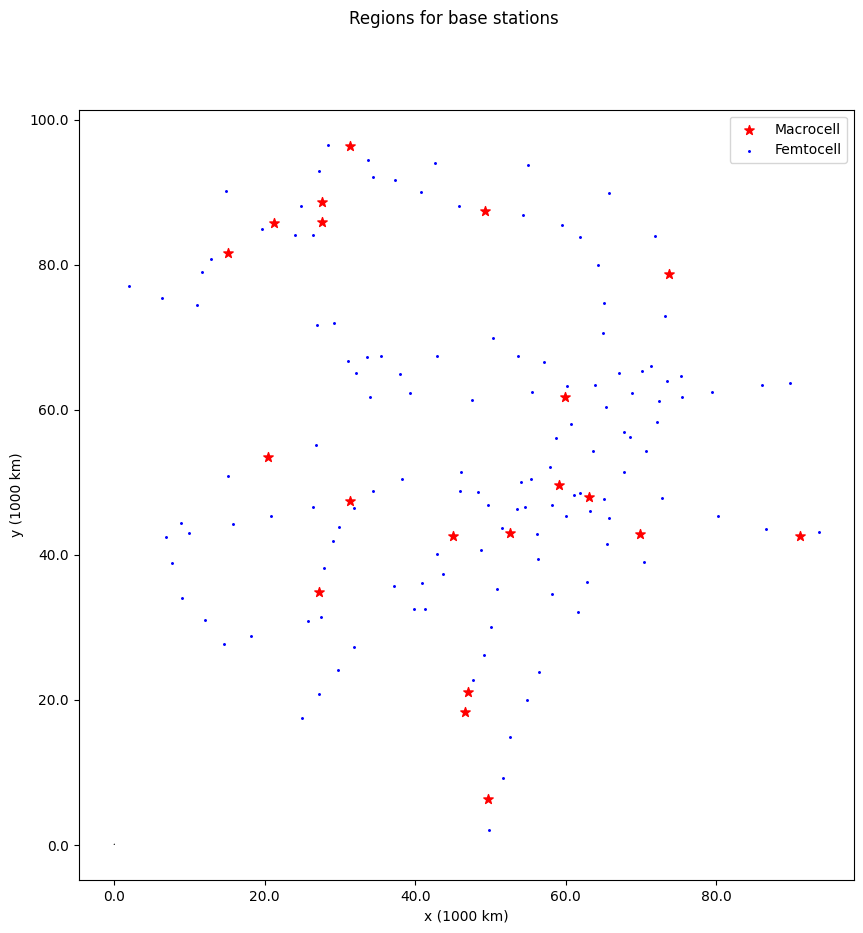

In [5]:
standard_plot(
    regions, 
    graph.nodes, 
    1000, 
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for base stations", "figsize": (10, 10)},
)

# Case 2: Try with max-distance based radius

In [6]:
regions_2 = create_regions(
    np.array(cells),
    alpha_loss, 
    polygon_bounds=base_area,
    euclidean_to_km_scale=scaling_factor,
    use_power_based_radius=False,
    max_radius_km_list=cells_max_radius,
)
regions_2

GEOSException: TopologyException: found non-noded intersection between LINESTRING (51.3147 63.6825, 49.5864 65.3891) and LINESTRING (49.5864 65.3891, 49.5865 65.3891) at 49.586433065511912 65.389117017259181

In [ ]:
standard_plot(
    regions_2, 
    graph.nodes, 
    1000, 
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for base stations", "figsize": (10, 10)},
)